# Dataset Information

## Import Modules

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Dataset

In [296]:
abalone = pd.read_csv('abalone.csv')

In [297]:
#displaying the different variables
abalone.head()

,Sex,ShellLengthmm,ShellDiametermm,ShellHeightmm,WholeWeightgrams,ShuckedWeightgrams,VisceraWeightgrams,ShellWeightgrams,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [298]:
#Showing the statistics of the dataset
abalone.describe()

,ShellLengthmm,ShellDiametermm,ShellHeightmm,WholeWeightgrams,ShuckedWeightgrams,VisceraWeightgrams,ShellWeightgrams,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [299]:
#Showing the basic information of the datatype
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 4177 non-null   object 
 1   ShellLengthmm       4177 non-null   float64
 2   ShellDiametermm     4177 non-null   float64
 3   ShellHeightmm       4177 non-null   float64
 4   WholeWeightgrams    4177 non-null   float64
 5   ShuckedWeightgrams  4177 non-null   float64
 6   VisceraWeightgrams  4177 non-null   float64
 7   ShellWeightgrams    4177 non-null   float64
 8   Rings               4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [300]:
#check for null values
abalone.isnull().sum()

Sex                   0
ShellLengthmm         0
ShellDiametermm       0
ShellHeightmm         0
WholeWeightgrams      0
ShuckedWeightgrams    0
VisceraWeightgrams    0
ShellWeightgrams      0
Rings                 0
dtype: int64

In [301]:
#Displaying the number of samples for each sex
abalone['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

## Exploratory Data Analysis

Below I will show a visualisation of the weight and height of the abalone data with a barchart and a histogram respectively.


I will do this using the Seaborn module imported at the beginning. My aim will be to:


- Display the individual datasets using Histograms with Seaborn.

- Compare the datsets in correlation to eachother with Scatterplots.

- Demonstrate the correlation between the two variables.


## Barchart

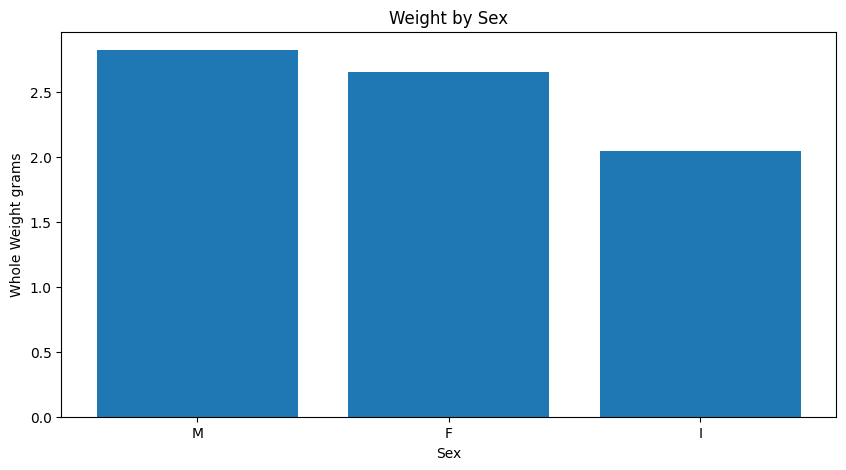

In [302]:
x_shell_height = abalone["Sex"]
y_whole_weight= abalone["WholeWeightgrams"]

# setting the size of the figure
fig = plt.figure(figsize=(10,5))


#bar plot
plt.bar(x_shell_height, y_whole_weight)
plt.xlabel("Sex")
plt.ylabel("Whole Weight grams")
plt.title("Weight by Sex")
plt.show()

## figure out how to change colour of each bar

From this we can see that the Males tend to weigh more than the females with the deviation being predictable for the data of the Infants.

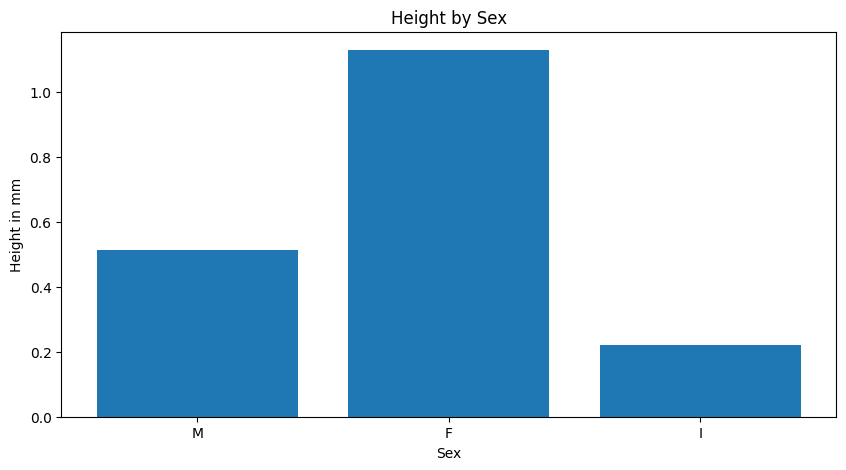

In [303]:
x_shell_height = abalone["Sex"]
y_whole_weight= abalone["ShellHeightmm"]

# setting the size of the figure
fig = plt.figure(figsize=(10,5))


#bar plot
plt.bar(x_shell_height, y_whole_weight)
plt.xlabel("Sex")
plt.ylabel("Height in mm")
plt.title("Height by Sex")
plt.show()

Contrary to the expected, a larger weight does not have a linear relationship with the height of the shell.
As shown by the difference between the Male and Female datasets.

## Histograms

Below is a visualisation with histograms of all variables:

array([[<Axes: title={'center': 'ShellLengthmm'}>,
        <Axes: title={'center': 'ShellDiametermm'}>,
        <Axes: title={'center': 'ShellHeightmm'}>,
        <Axes: title={'center': 'WholeWeightgrams'}>],
       [<Axes: title={'center': 'ShuckedWeightgrams'}>,
        <Axes: title={'center': 'VisceraWeightgrams'}>,
        <Axes: title={'center': 'ShellWeightgrams'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

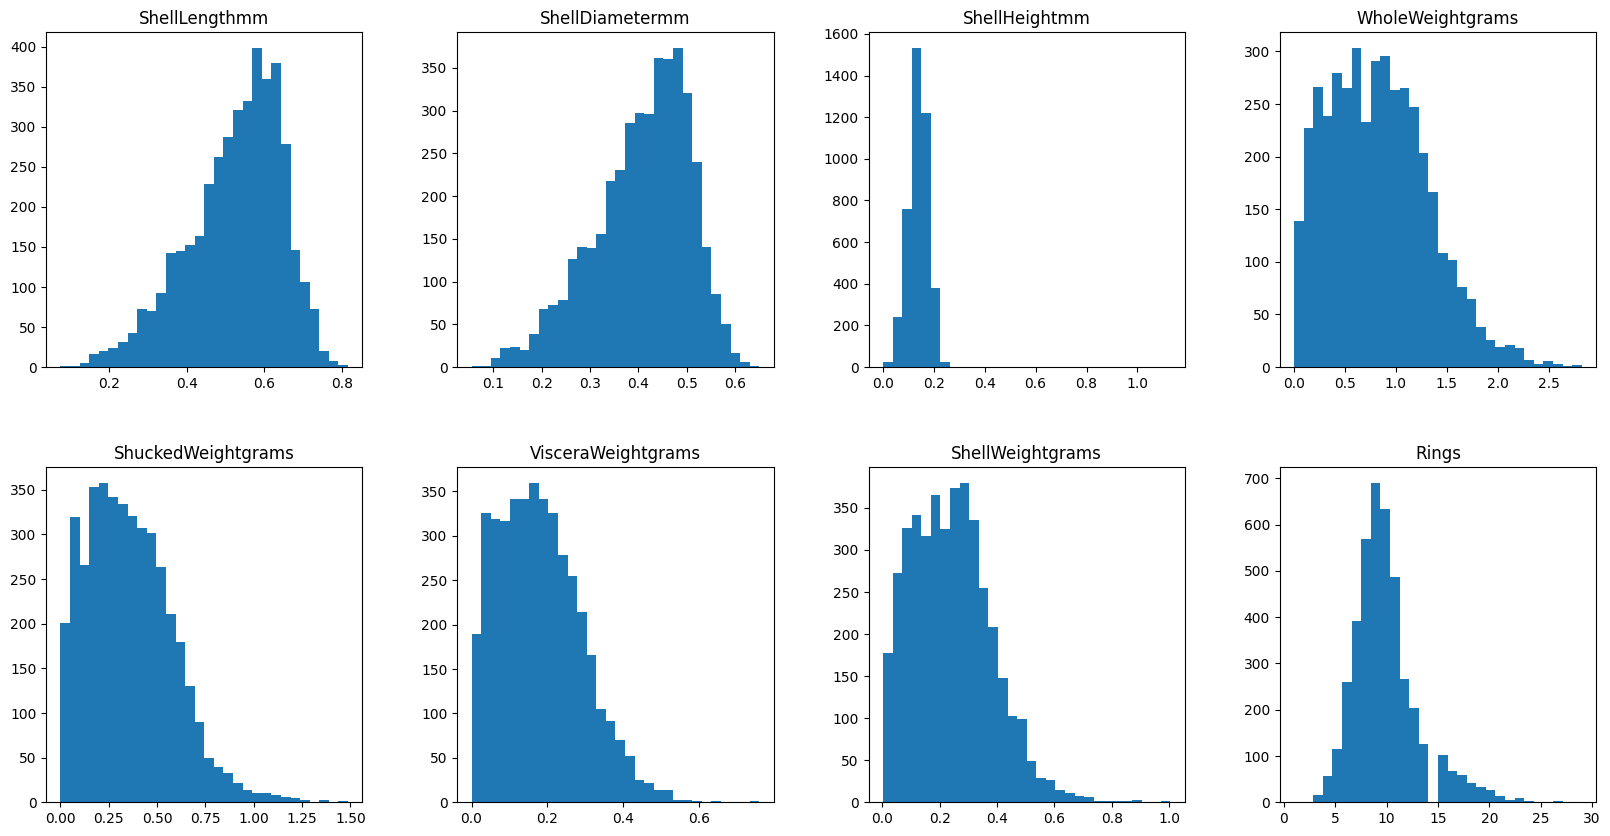

In [304]:
abalone.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)


Here, we will be focusing on the Whole Weight and the Shell Height:

<Axes: xlabel='WholeWeightgrams', ylabel='Count'>

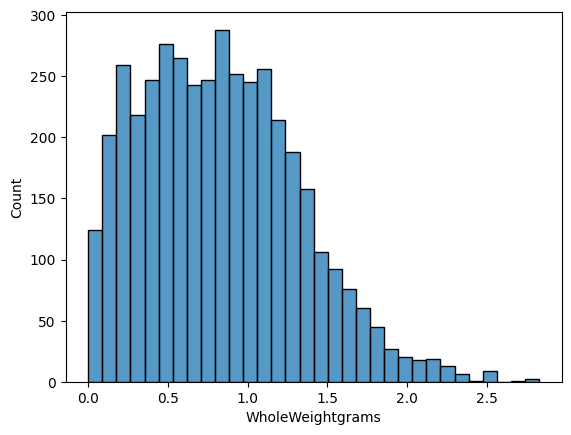

In [305]:
sns.histplot(data=abalone, x="WholeWeightgrams")

<Axes: xlabel='ShellHeightmm', ylabel='Count'>

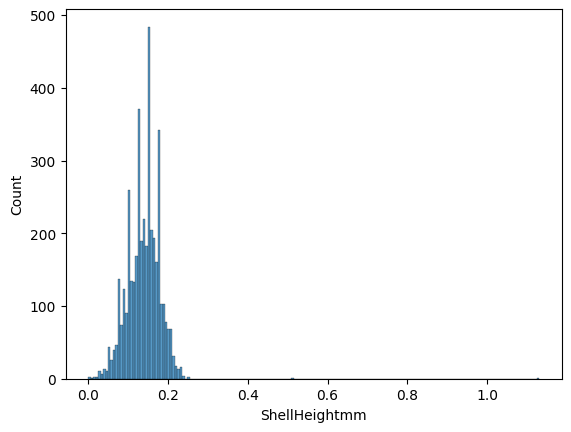

In [306]:
sns.histplot(data=abalone, x="ShellHeightmm")


## Correlation Matrix

In [307]:
# Convert non-numeric values to NaN
abalone_numeric = abalone.apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
correlation_matrix = abalone_numeric.corr()

# Customize formatting and print correlation matrix
print(correlation_matrix.to_string(float_format="{:.2f}".format))

                    Sex  ShellLengthmm  ShellDiametermm  ShellHeightmm  WholeWeightgrams  ShuckedWeightgrams  VisceraWeightgrams  ShellWeightgrams  Rings
Sex                 NaN            NaN              NaN            NaN               NaN                 NaN                 NaN               NaN    NaN
ShellLengthmm       NaN           1.00             0.99           0.83              0.93                0.90                0.90              0.90   0.56
ShellDiametermm     NaN           0.99             1.00           0.83              0.93                0.89                0.90              0.91   0.57
ShellHeightmm       NaN           0.83             0.83           1.00              0.82                0.77                0.80              0.82   0.56
WholeWeightgrams    NaN           0.93             0.93           0.82              1.00                0.97                0.97              0.96   0.54
ShuckedWeightgrams  NaN           0.90             0.89           0.77      

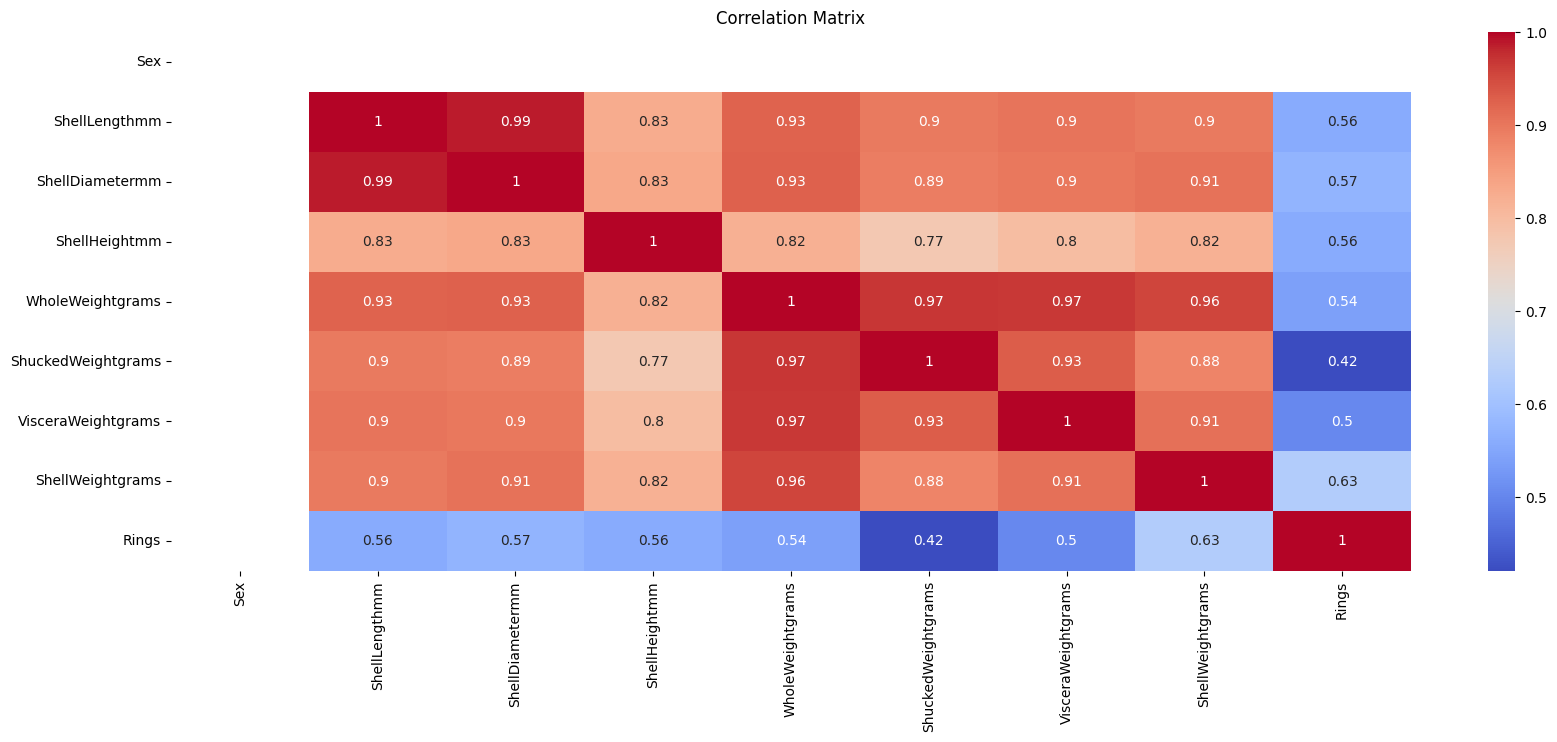

In [308]:
plt.figure(figsize=(20, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

I decided to use a heat map to show the correlation between the two variable:

* From the information shown on the heat map, we can see that there is indeed a strong correlation between the Shell Height and the Whole Weight (r = 0.82)